# Shared and population-specific genetic variation

This analysis aimed to answer the following research questions:
1. **What is the extent of shared and unique genetic variation within Western, Eastern, Southern and Central Africa?**
2. **What is the extent of shared and unique genetic variation within Southern African subpopulations?**

To answer these question, the following steps were completed:

1. Data Generation: Genetic variation data was generated from genetic information obtained from the [GnomAD 1000 Genomes and HGDP datasets](https://gnomad.broadinstitute.org/news/2021-10-gnomad-v3-1-2-minor-release/) for African population groups.
2. Data Preparation: The generated data was processed and prepared for analysis following the steps detailed in the `Notebooks\Data_preparation\2-IH_allele_counts.ipynb` Jupyter notebook. The resulting prepared data is stored in the `Data\Processed\IH_allele_counts.csv` file.
3. Allele Count Determination: For each African region/South African subpopulation, genetic variant allele counts were determined, providing insights into the prevalence of specific genetic variants within each region/subpopulation.
4. Visualization: To compare the shared and unique genetic variation among the different African regions/South African subpopulations, upset plots were used. Upset plots are data visualizations that allow for easy comparison of overlapping or intersecting sets or categories, providing a clear picture of the genetic variation patterns among the African populations.

## Import libraries and modules

In [7]:
# Change working directory

import os
os.chdir(r"C:\Users\User\Desktop\Megan\MSC2\Results\5._Posthoc_analysis\Pipeline_GnomAD_14032023\Notebooks")

In [18]:
# Import modules and packages

import pandas as pd
import upsetplot
from matplotlib import pyplot as plt
import seaborn as sns

import sys

sys.path.append(
    r"C:\Users\User\Desktop\Megan\MSC2\Results\5._Posthoc_analysis\Pipeline_GnomAD_14032023"
)
import Utils.constants as constants
import Utils.functions as functions


## Import data

In [9]:
# Import sub-population allele count data

ih_allele_counts = pd.read_csv(
    os.path.join(
        constants.HOME_PATH,
        "Data",
        "Processed",
        "IH_allele_counts.csv",
    )
).drop(columns=["Unnamed: 0"])

ih_allele_counts.head(5)

,VAR_NAME,POS,REF,ALT,GENE,SUB_POP,IH_ALT_CTS,IH_TOTAL_CTS,ID,CORR_IH_TOTAL_CTS,CORR_IH_REF_CTS,CORR_IH_AF,REG,VARIANT_TYPE
0,chr13:110148882C-CT,110148882,C,CT,COL4A1,ACB,0,228,110148882_CT_C,228,228,0.0,ACB,INDEL
1,chr13:110148882C-CT,110148882,C,CT,COL4A1,Yoruba,0,42,110148882_CT_C,42,42,0.0,WA,INDEL
2,chr13:110148882C-CT,110148882,C,CT,COL4A1,Mandenka,0,46,110148882_CT_C,46,46,0.0,WA,INDEL
3,chr13:110148882C-CT,110148882,C,CT,COL4A1,ESN,0,296,110148882_CT_C,296,296,0.0,WA,INDEL
4,chr13:110148882C-CT,110148882,C,CT,COL4A1,BantuKenya,0,24,110148882_CT_C,24,24,0.0,EA,INDEL


In [10]:
# Import sample population data 

sample_subpopulations = pd.read_csv(
    os.path.join(
        constants.HOME_PATH,
        "Data",
        "Processed",
        "Sample_populations.csv",
    )
).drop(columns="Unnamed: 0")

sample_subpopulations.tail(5)

,SUB,SAMPLE_NAME,REG
984,ASW,NA20412,ASW
985,Mandenka,SS6004470,WA
986,MbutiPygmy,SS6004471,CA
987,San,SS6004473,SA
988,Yoruba,SS6004475,WA


## **Exploratory analysis of unique genetic variant count as a function of sample size**
To get an understanding of how much unique genetic variation is contributed by each African population group to the analysis, I visualised the number of unique variants as a function of the sample size. In this visualization, I incrementally added each subpopulation group to the analysis, allowing the observation of how much unique genetic variation each population group brings to the overall dataset. This approach helps in understanding the diversity and genetic distinctiveness of each African population group and their collective impact on the analysis.

Group sample population data by sample sub-population to get the number of samples per sub-population

In [11]:
grouped_sample_subpopulations = functions.group_and_count(sample_subpopulations, ["SUB"]).reset_index().rename(columns={"SAMPLE_NAME":"SAMPLE_COUNT"}).drop(columns="REG")
grouped_sample_subpopulations["REG"] = grouped_sample_subpopulations["SUB"].map(constants.LD_REGIONAL_CLASSIFICATION)
grouped_sample_subpopulations.head(5)

,SUB,SAMPLE_COUNT,REG
0,ACB,114,ACB
1,ASW,71,ASW
2,BantuKenya,12,EA
3,BantuSouthAfrica,8,SA
4,BiakaPygmy,26,CA


Remove allele count data for variants that are not present in the African populations. Exclude African American or African Caribbean variant allele data from the analysis.

In [12]:
# Use ih_allele_counts dataframe. Remove rows with variants with alternate allele frequencies of 0. These variants are not present in the subpopulation.
region_specific_allele_counts = ih_allele_counts.dropna(subset="SUB_POP")[~(ih_allele_counts.CORR_IH_AF == 0.0)]

# Drop ASW and ACB regions
region_specific_allele_counts = region_specific_allele_counts[~ ((region_specific_allele_counts.REG == "ACB") | (region_specific_allele_counts.REG == "ASW"))]

region_specific_allele_counts.head(5)

C:\Users\User\AppData\Local\Temp\ipykernel_6560\1377922665.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  region_specific_allele_counts = ih_allele_counts.dropna(subset="SUB_POP")[~(ih_allele_counts.CORR_IH_AF == 0.0)]


,VAR_NAME,POS,REF,ALT,GENE,SUB_POP,IH_ALT_CTS,IH_TOTAL_CTS,ID,CORR_IH_TOTAL_CTS,CORR_IH_REF_CTS,CORR_IH_AF,REG,VARIANT_TYPE
20,rs552586867,110148891,C,G,COL4A1,YRI,2,350,110148891_G_C,350,348,0.005714,WA,SNP
32,rs59409892,110148917,C,G,COL4A1,BantuSouthAfrica,2,16,110148917_G_C,16,14,0.125000,SA,SNP
34,rs59409892,110148917,C,G,COL4A1,GWD,38,352,110148917_G_C,352,314,0.107955,WA,SNP
35,rs59409892,110148917,C,G,COL4A1,LWK,13,194,110148917_G_C,194,181,0.067010,EA,SNP
36,rs59409892,110148917,C,G,COL4A1,MSL,18,196,110148917_G_C,196,178,0.091837,WA,SNP


Order Eastern, Western, Southern and Central African subpopulations in order of smallest to largest population count.

In [13]:
# Order subpopulations by sample count. Re-use grouped_sample_subpopulations dataframe.
subpopulation_order = grouped_sample_subpopulations.sort_values(by=["SAMPLE_COUNT", "REG"]).SUB.tolist()
subpopulation_order

['San',
 'BantuSouthAfrica',
 'BantuKenya',
 'MbutiPygmy',
 'Yoruba',
 'Mandenka',
 'BiakaPygmy',
 'ASW',
 'LWK',
 'MSL',
 'ACB',
 'ESN',
 'YRI',
 'GWD']

In [14]:
# Order subpopulations in region_specific_allele_counts dataframe. 
collated_af_ordered = region_specific_allele_counts.copy()
collated_af_ordered.sort_values(by="SUB_POP", key=lambda column: column.map(lambda e: subpopulation_order.index(e)), inplace=True)

collated_af_ordered.head(5)

,VAR_NAME,POS,REF,ALT,GENE,SUB_POP,IH_ALT_CTS,IH_TOTAL_CTS,ID,CORR_IH_TOTAL_CTS,CORR_IH_REF_CTS,CORR_IH_AF,REG,VARIANT_TYPE
231446,rs7080,230705941,T,C,AGT,San,12,12,230705941_C_T,12,0,1.000000,SA,SNP
139173,chr13:110288274A-AAAAT,110288274,A,AAAAT,COL4A1,San,1,12,110288274_AAAAT_A,12,11,0.083333,SA,INDEL
29228,rs774438736,110181404,CA,C,COL4A1,San,3,12,110181404_C_CA,12,9,0.250000,SA,INDEL
138961,rs201101407,110288262,CAA,C,COL4A1,San,2,6,110288262_C_CAA,12,10,0.166667,SA,INDEL
29395,rs9521634,110181552,T,C,COL4A1,San,4,12,110181552_C_T,12,8,0.333333,SA,SNP


Remove duplicated variants to avoid counting the same variant twice. We would like to see how the number of unique variants changes with the addition of sample populations, so need to avoid counting the same variant twice.

In [15]:
collated_af_unique = collated_af_ordered.drop_duplicates(subset=["ID"])

Group by sub-population and count cumulative number of variants

In [16]:
collated_af_subpop = collated_af_unique.groupby(["SUB_POP"]).size().reset_index().rename(columns={0:"VARIANT_COUNT"})
collated_af_subpop.sort_values(by="SUB_POP", key=lambda column: column.map(lambda e: subpopulation_order.index(e)), inplace=True)
collated_af_subpop["CUMULATIVE_TOTAL_VARIANTS"] = collated_af_subpop["VARIANT_COUNT"].cumsum()

Add sample count information to dataframe and count cumulative number of samples

In [17]:
collated_af_subpop = collated_af_subpop.merge(grouped_sample_subpopulations, left_on="SUB_POP", right_on="SUB").drop(columns=["SUB"]).set_index("SUB_POP")
collated_af_subpop["CUMULATIVE_SAMPLES"] = collated_af_subpop.sort_values(by=["VARIANT_COUNT", "REG"], ascending=True)["SAMPLE_COUNT"].cumsum()
collated_af_subpop.head(5)

,VARIANT_COUNT,CUMULATIVE_TOTAL_VARIANTS,SAMPLE_COUNT,REG,CUMULATIVE_SAMPLES
SUB_POP,,,,,
San,2267,2267,6,SA,804
BantuSouthAfrica,949,3216,8,SA,701
BantuKenya,654,3870,12,EA,419
MbutiPygmy,613,4483,14,CA,407
Yoruba,591,5074,21,WA,393


Create a plot showing the number of genetic variants as a function of sample size, while incrementally adding each subpopulation group to the analysis in a cumulative manner.

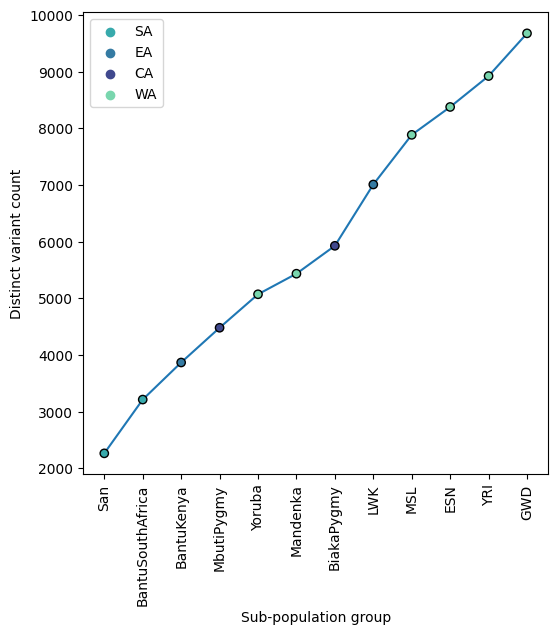

In [19]:
fig, ax = plt.subplots(figsize=(6, 6))

color_dict = dict({'SA':'#38AAAC',
                  'EA':'#357BA3',
                  'CA': '#40498E',
                  'WA': '#79D6AE'})

cum_variant_lineplot = sns.scatterplot(
    data=collated_af_subpop,
    x="SUB_POP",
    y="CUMULATIVE_TOTAL_VARIANTS",
    marker="o",
    hue="REG",
    palette=color_dict,
    edgecolor='black',
    linewidth = 1,
    zorder=100
)
cum_variant_lineplot = sns.lineplot(
    data=collated_af_subpop,
    x="SUB_POP",
    y="CUMULATIVE_TOTAL_VARIANTS",
    marker=None,
    zorder=1
)


cum_variant_lineplot.set(xlabel="Sub-population group", ylabel="Distinct variant count")

# Plot novel variants as a function of sample size
plt.xticks(rotation=90)
plt.savefig("..\Results\Figures\Variant_discovery_curve.png", dpi=1200, bbox_inches="tight")
plt.show()

## **Analysis to answer first research question:**

## Select data for Western Africa, Central Africa, Southern Africa and Eastern African regions.
Remove data for African American and African Caribbean regions. Exclude summarised data for Recent African and African populations.

In [8]:
# Group by variant and region. Remove rows with variants with alternate allele counts of 0. These variants are not present in the region.
region_specific_allele_counts = ih_allele_counts.groupby(by=["VAR_NAME", "ID", "POS", "REF", "ALT", "VARIANT_TYPE", "GENE", "REG"]).sum()
region_specific_allele_counts = region_specific_allele_counts[~(region_specific_allele_counts.IH_ALT_CTS == 0)].drop(columns="CORR_IH_AF").reset_index()

# Drop rows with region set to African, Recent African, African American or African Caribbean
region_specific_allele_counts = region_specific_allele_counts[~((region_specific_allele_counts.REG == "Recent African") | (region_specific_allele_counts.REG == "African") | (region_specific_allele_counts.REG == "ACB") | (region_specific_allele_counts.REG == "ASW"))]

region_specific_allele_counts.head(5)

C:\Users\User\AppData\Local\Temp\ipykernel_9952\4221114073.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  region_specific_allele_counts = ih_allele_counts.groupby(by=["VAR_NAME", "ID", "POS", "REF", "ALT", "VARIANT_TYPE", "GENE", "REG"]).sum()


,VAR_NAME,ID,POS,REF,ALT,VARIANT_TYPE,GENE,REG,IH_ALT_CTS,IH_TOTAL_CTS,CORR_IH_TOTAL_CTS,CORR_IH_REF_CTS
1,chr11:34438836T-C,34438836_C_T,34438836,T,C,SNP,CAT,EA,1,218,218,217
5,chr11:34438889G-C,34438889_C_G,34438889,G,C,SNP,CAT,SA,1,28,28,27
8,chr11:34439223G-C,34439223_C_G,34439223,G,C,SNP,CAT,WA,2,1282,1282,1280
11,chr11:34439262C-T,34439262_T_C,34439262,C,T,SNP,CAT,WA,1,1282,1282,1281
14,chr11:34439312G-A,34439312_A_G,34439312,G,A,SNP,CAT,SA,1,28,28,27


## Find the shared and regional specific variation

In [9]:
# Generate a dictionary with lists of variants for each region
region_variant_dict = {}
for region in region_specific_allele_counts.REG.unique():
    region_variants = region_specific_allele_counts[region_specific_allele_counts.REG == region]["ID"].unique()
    region_variant_dict[region] = region_variants

# Generate a set with the union of all variants across the lists
all_variants = set()
for value in region_variant_dict.values():
    all_variants.update(value)

# Find overlap in values for each region
variant_overlap = pd.DataFrame()

for region in region_specific_allele_counts.REG.unique():
    region_variant_overlap = pd.DataFrame([[e in region_variant_dict[region]] for e in all_variants], columns = [region])
    variant_overlap = pd.concat([variant_overlap, region_variant_overlap], axis=1)

# Group values
variant_overlap_grouped = variant_overlap.groupby(by = variant_overlap.columns.tolist()).size()
variant_overlap_grouped.head(5)

EA     SA     WA     CA   
False  False  False  True      550
              True   False    3110
                     True      234
       True   False  False     342
                     True       68
dtype: int64

## Plot overlap of variants for each African region

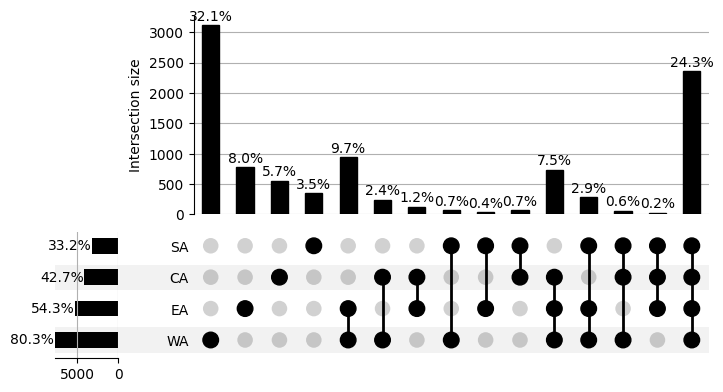

In [10]:
upsetplot.plot(variant_overlap_grouped, show_percentages=True, orientation='horizontal', facecolor="black")
plt.savefig("..\Results\Figures\Shared_and_population_specific_variation.png", dpi=1200)
plt.show()

## **Analysis to answer second research question:**

## Select data for Southern African subpopulations.

In [11]:
# Subset by Southern Africa subpopulations. Remove rows with variants with alternate allele counts of 0. These variants are not present in the subpopulations.
sa_allele_counts = ih_allele_counts[ih_allele_counts.REG == "SA"]
sa_allele_counts = sa_allele_counts[~(sa_allele_counts.IH_ALT_CTS == 0)].drop(columns="CORR_IH_AF").reset_index(drop=True)

# Rename subpopulations
sa_allele_counts = sa_allele_counts.replace({"SUB_POP": constants.SUBPOP_RENAME})

sa_allele_counts.head(5)

,VAR_NAME,POS,REF,ALT,GENE,SUB_POP,IH_ALT_CTS,IH_TOTAL_CTS,ID,CORR_IH_TOTAL_CTS,CORR_IH_REF_CTS,REG,VARIANT_TYPE
0,rs59409892,110148917,C,G,COL4A1,Bantu South Africa,2,16,110148917_G_C,16,14,SA,SNP
1,rs548562512,110149741,C,T,COL4A1,San,1,12,110149741_T_C,12,11,SA,SNP
2,rs13260,110149776,G,T,COL4A1,Bantu South Africa,5,16,110149776_T_G,16,11,SA,SNP
3,rs116538870,110149872,T,C,COL4A1,Bantu South Africa,1,16,110149872_C_T,16,15,SA,SNP
4,chr13:110151280T-C,110151280,T,C,COL4A1,Bantu South Africa,1,16,110151280_C_T,16,15,SA,SNP


## Find the shared and Southern African subpopulation specific variation

In [12]:
# Generate a dictionary with lists of variants for each region
sa_variant_dict = {}
for sub_pop in sa_allele_counts.SUB_POP.unique():
    sa_variants = sa_allele_counts[sa_allele_counts.SUB_POP == sub_pop]["ID"].unique()
    sa_variant_dict[sub_pop] = sa_variants

# Generate a set with the union of all variants across the lists
all_variants = set()
for value in sa_variant_dict.values():
    all_variants.update(value)

# Find overlap in values for each region
variant_overlap = pd.DataFrame()

for sub_pop in sa_allele_counts.SUB_POP.unique():
    sa_variant_overlap = pd.DataFrame([[e in sa_variant_dict[sub_pop]] for e in all_variants], columns = [sub_pop])
    variant_overlap = pd.concat([variant_overlap, sa_variant_overlap], axis=1)

# Group values
variant_overlap_grouped = variant_overlap.groupby(by = variant_overlap.columns.tolist()).size()
variant_overlap_grouped.head(5)

Bantu South Africa  San  
False               True      685
True                False     949
                    True     1582
dtype: int64

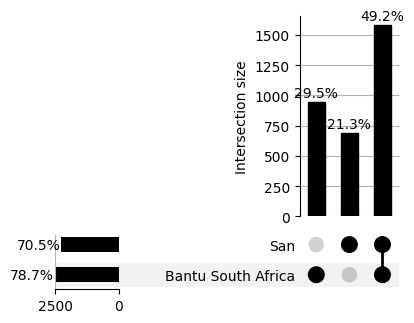

In [13]:
# Plot overlap of variants for each subpopulation 
upsetplot.plot(variant_overlap_grouped, show_percentages=True, orientation='horizontal', facecolor="black")
plt.savefig("..\Results\Figures\Shared_and_population_specific_variation_SA.png", dpi=1200)
plt.show()